In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import geopandas as gpd 
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as mcm
import matplotlib.ticker as mticker

In [5]:
df=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Jupyter nootbook\\Summer 2017 REU\\seasonal_by_tract.csv')

In [6]:
calls=pd.melt(df,id_vars=['complaint_type','created_date'] 
              #create the column of complaint type and created date
              ,var_name=['boro_ct201']
              #this create a value column out of boro_ct201
             )

In [8]:
heating=calls[calls['complaint_type'].str.match('HEATING')]

In [9]:
heating['boro_ct201']=heating['boro_ct201'].str[:7]
heating.head()

C:\Users\xuebi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


complaint_type created_date boro_ct201  value
32         HEATING   2004-03-01    1000100    NaN
55         HEATING   2004-06-01    1000100    NaN
77         HEATING   2004-09-01    1000100    NaN
94         HEATING   2004-12-01    1000100    NaN
121        HEATING   2005-03-01    1000100    NaN

In [10]:
h=heating.pivot_table(index='created_date',columns='boro_ct201')['value']

In [11]:
h.head()

boro_ct201    1000201  1000202  1000600  1000700  1000800  1000900  1001001  \
created_date                                                                  
2004-03-01        1.0      1.0     21.0      NaN     28.0      NaN      NaN   
2004-06-01        1.0      2.0      1.0      1.0     15.0      NaN      NaN   
2004-09-01        1.0      7.0     68.0      1.0     72.0      2.0      1.0   
2004-12-01       10.0     36.0    143.0     18.0    134.0      4.0     21.0   
2005-03-01        NaN      3.0     48.0      1.0     36.0      NaN      5.0   

boro_ct201    1001200  1001300  1001401   ...     5027706  5027900  5029102  \
created_date                              ...                                 
2004-03-01        NaN      2.0      NaN   ...         NaN      NaN      NaN   
2004-06-01        3.0      1.0      4.0   ...         NaN      NaN      NaN   
2004-09-01        3.0     16.0      4.0   ...         2.0      NaN      NaN   
2004-12-01       34.0     24.0     12.0   ...         4.0      NaN      1.0   
2005-03-01        5.0      1.0      5.0   ...         1.0      NaN      NaN   

boro_ct201    5029103  5029104  5030301  5030302  5031901  5031902  5032300  
created_date                                                                 
2004-03-01        NaN      1.0      1.0      1.0      NaN      4.0      NaN  
2004-06-01        NaN      NaN      NaN      1.0      NaN     19.0      NaN  
2004-09-01        4.0      4.0      6.0      1.0      1.0     63.0      2.0  
2004-12-01        3.0      1.0      9.0      4.0      1.0    407.0      1.0  
2005-03-01        NaN      NaN      5.0      1.0      NaN     55.0      NaN  

[5 rows x 2116 columns]

In [17]:
L=[]
for i in h.index:
    L.append(i)
K=dict()
for i in L[1::5]:
    K[i]=h.loc[i]
test=pd.DataFrame(K)
test.index.names=['boro_ct201']
test.head()

2004-06-01  2005-09-01  2006-12-01  2008-03-01  2009-06-01  \
boro_ct201                                                               
1000201            1.0        10.0        12.0         1.0         NaN   
1000202            2.0         6.0        35.0        26.0         NaN   
1000600            1.0        50.0        79.0        24.0         4.0   
1000700            1.0         NaN         1.0         NaN         2.0   
1000800           15.0        78.0        84.0        40.0         2.0   

            2010-09-01  2011-12-01  2013-03-01  
boro_ct201                                      
1000201            2.0         6.0        82.0  
1000202            4.0         8.0         NaN  
1000600           49.0        40.0        27.0  
1000700            3.0         1.0         2.0  
1000800           43.0       107.0         8.0

In [18]:
shpfile = 'C:\\Users\\xuebi\\Desktop\\census_tracts\\census_tracts\\census2010.shp'
coord_system = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame.from_file(shpfile, crs=coord_system)

In [19]:
tracts=gdf.copy()[['boro_ct201','geometry']].merge(test,
                   left_on='boro_ct201',right_index=True)
tracts.head()

boro_ct201                                           geometry  2004-06-01  \
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...         1.0   
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...        10.0   
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...         1.0   
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...         NaN   
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...         1.0   

   2005-09-01  2006-12-01  2008-03-01  2009-06-01  2010-09-01  2011-12-01  \
0        20.0        28.0        12.0         1.0        16.0        14.0   
1        53.0        81.0        46.0        10.0        31.0        32.0   
2         5.0        18.0         3.0         NaN        10.0        21.0   
3         NaN         2.0         NaN         NaN         NaN         NaN   
4        10.0        11.0         6.0         NaN         6.0         1.0   

   2013-03-01  
0        40.0  
1        29.0  
2         2.0  
3         NaN  
4         1.0

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


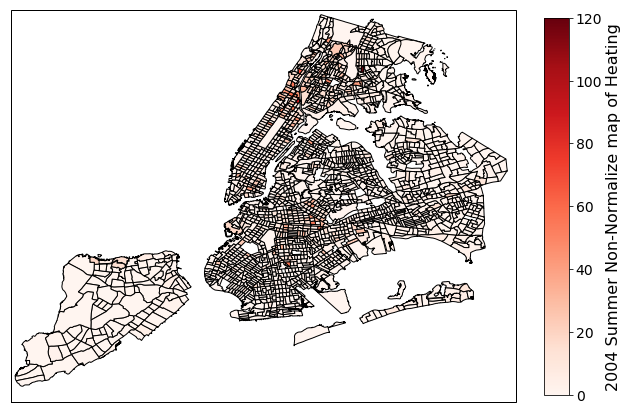

In [29]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2004-06-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2004-06-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='black')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2004 Summer Non-Normalize map of Heating" , fontsize=16)

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


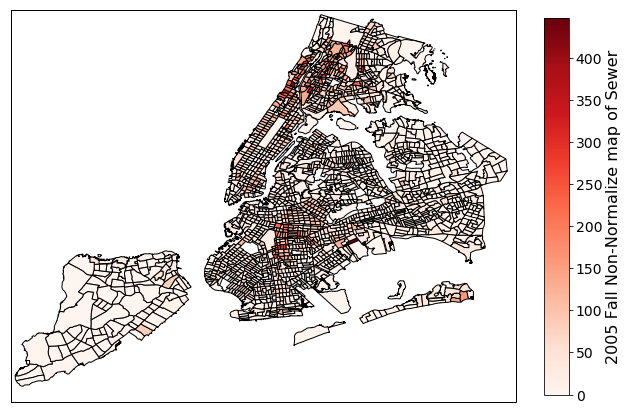

In [22]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2005-09-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2005-09-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='black')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2005 Fall Non-Normalize map of Heating" , fontsize=16)

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


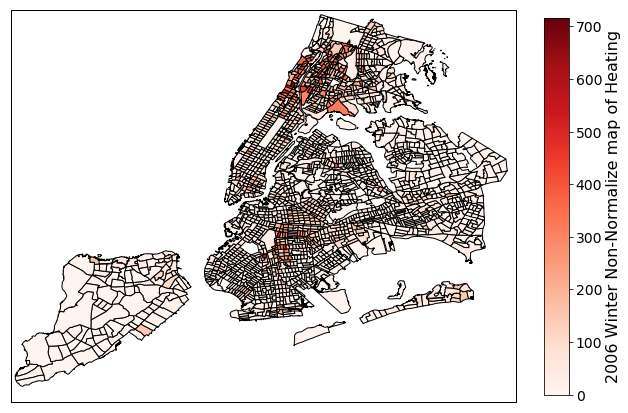

In [28]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2006-12-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2006-12-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='black')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2006 Winter Non-Normalize map of Heating" , fontsize=16)

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


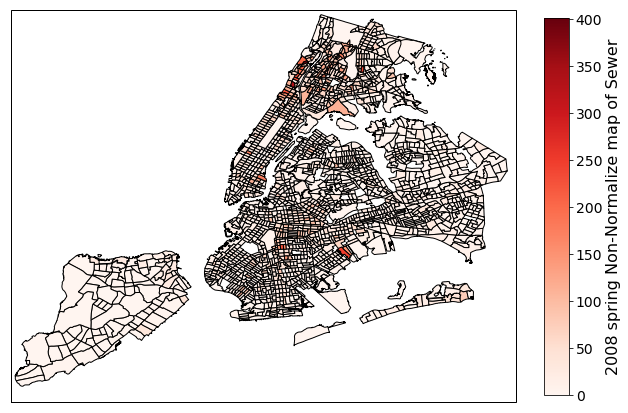

In [25]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2008-03-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2008-03-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='black')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2008 spring Non-Normalize map of Heating" , fontsize=16)

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


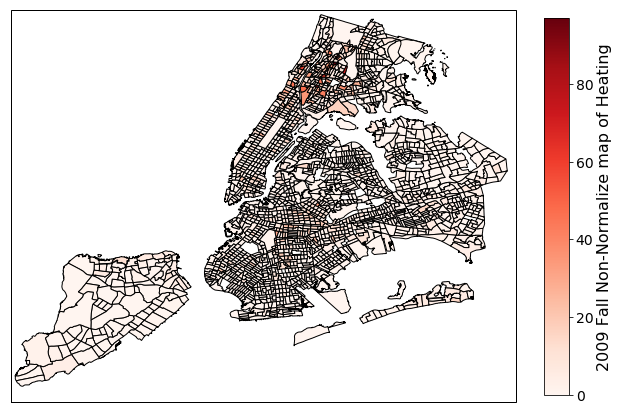

In [27]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2009-06-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2009-06-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='black')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2009 Fall Non-Normalize map of Heating" , fontsize=16)

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


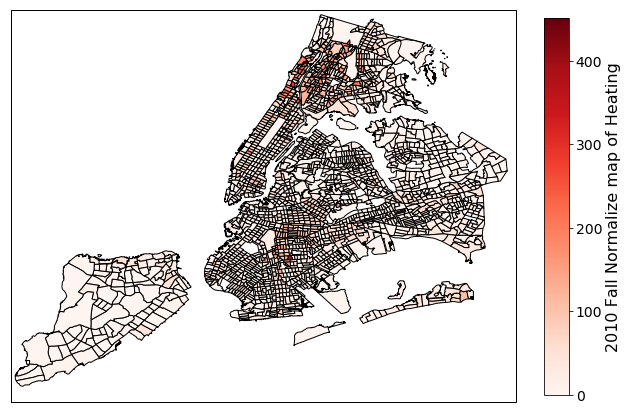

In [30]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2010-09-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2010-09-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='black')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2010 Fall Normalize map of Heating" , fontsize=16)